# Optimización Heuristica

## Integrantes

- Jakelin Daiana Correa Palacio
- Andrés Felipe Lema García
- Luis Felipe Moreno Chamorro

## Librerías necesarias

In [43]:
pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install pyswarm

Note: you may need to restart the kernel to use updated packages.


In [47]:
# Notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# .py
from scipy.optimize import minimize
from scipy.optimize import differential_evolution, minimize, dual_annealing
from scipy.optimize import basinhopping, shgo
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LogNorm
import matplotlib.animation as animation
from IPython.display import HTML, IFrame

import json
from itertools import permutations
import folium
from folium import plugins


## Parte 1: optimización numérica

### 1. Funciones de prueba elegidas.
Se escogen las funciones:
- Rosenbrock
- Rastrigin

In [48]:
# Parte 1: optimización numérica

# 1. Escoja dos funciones de prueba

# Seleccionamos Función de Rosenbrock y Función de Rastrigin y las definimos

def rosenbrock(x):
    return sum(100.0 * np.square((x[1:] - np.square(x[:-1]))) + (1 - np.square(x[:-1])))

def rastrigin(x):
    return 10 * len(x) + sum(np.square(x) - 10 * np.cos(2 * np.pi * x))

#Función que uso para gráficar, porque me parece que la de arriba solo funciona para una arreglo unidimensional
def rastrigin2(x, A=10):
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

#### Función de Rosenbrock

Visualicemos como luce la función de Rosenbrock en 2d y en 3d, para hacernos una idea del proceso de optimización.

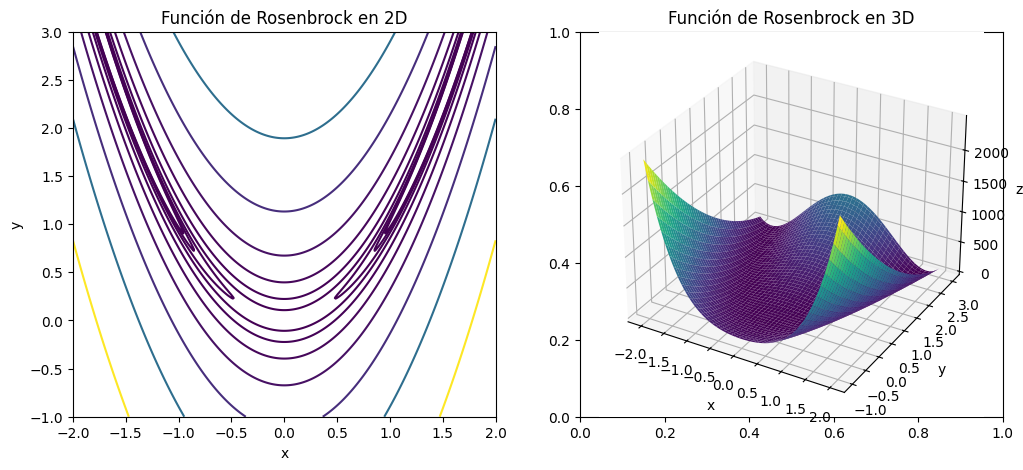

In [49]:
# Generamos datos para graficar en 2D
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z_2d = rosenbrock([X, Y])

# Generamos datos para graficar en 3d
x_3d = np.linspace(-2, 2, 100)
y_3d = np.linspace(-1, 3, 100)
X_3d, Y_3d = np.meshgrid(x_3d, y_3d)
Z_3d = rosenbrock([X_3d, Y_3d])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Grafica en 2D
axs[0].contour(X, Y, Z_2d, levels=np.logspace(-1, 3, 10), cmap='viridis')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Función de Rosenbrock en 2D')

# Grafica en 3D
axs[1] = fig.add_subplot(122, projection='3d')
axs[1].plot_surface(X_3d, Y_3d, Z_3d, cmap='viridis')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_zlabel('z')
axs[1].set_title('Función de Rosenbrock en 3D')

plt.show()

#### Función de Rastrigin

Visualicemos como luce la función de Rastrigin en 2d y en 3d, para hacernos una idea del proceso de optimización.

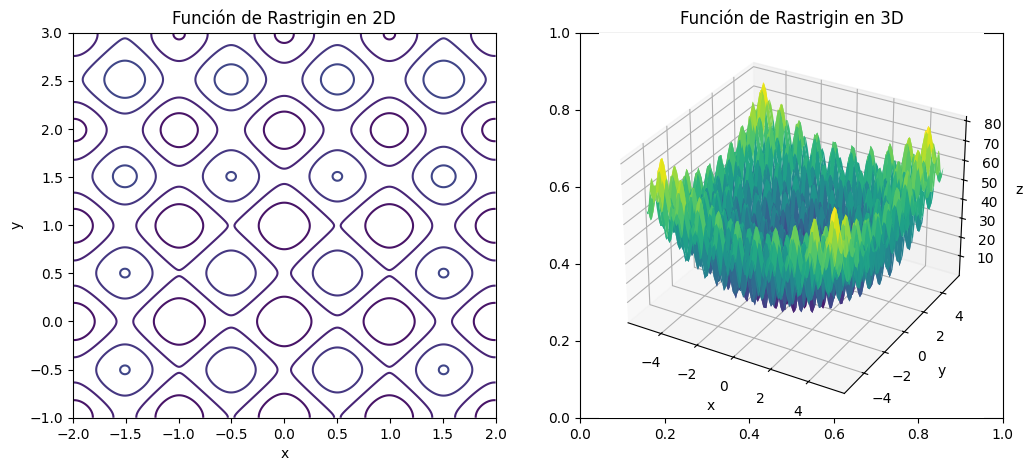

In [50]:
#Gráfica en 2D
x1 = np.linspace(-5.12, 5.12, 400)
x2 = np.linspace(-5.12, 5.12, 400)
X1, X2 = np.meshgrid(x1, x2)
X, Y = np.meshgrid(x, y)
Z_2d = rastrigin2([X, Y])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].contour(X, Y, Z_2d, levels=np.linspace(0, 200, 20), cmap='viridis')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Función de Rastrigin en 2D')

# Grafica en 3d
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = rastrigin2([X[i,j], Y[i,j]])

axs[1] = fig.add_subplot(122, projection='3d')
axs[1].plot_surface(X, Y, Z, cmap='viridis')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_zlabel('z')
axs[1].set_title('Función de Rastrigin en 3D')

plt.show()

### 2. Optimización de funciones usando descenso por gradiente.
Procedemos a optimizar las funciones en dos y tres dimensiones usando el método de descenso por gradiente con condición inicial aleatoria.

In [51]:
# Definimos el metodo

# Método de descenso por gradiente
def gradient_descent(func, dim):
    x0 = np.random.rand(dim)
    result = minimize(func, x0, method='L-BFGS-B')
    return result.x, result.fun

# Optimización en 2 dimensiones

dim_2 = 2

rosenbrock_gd_2 = gradient_descent(rosenbrock, dim_2)
rastrigin_gd_2 = gradient_descent(rastrigin, dim_2)

# Optimización en 3 dimensiones

dim_3 = 3

rosenbrock_gd_3 = gradient_descent(rosenbrock, dim_3)
rastrigin_gd_3 = gradient_descent(rastrigin, dim_3)

### Punto 3.
Optimice las funciones en dos y tres dimensiones usando: algoritmos evolutivos, optimización de partículas y evolución diferencial

In [52]:
# Definimos los metodos

# Algoritmos evolutivos
def evolutionary_algorithm(func, dim):
    bounds = [(0, 1)] * dim
    result = differential_evolution(func, bounds)
    return result.x, result.fun

# Optimización de partículas
def particle_optimization(func, dim):
    bounds = [(0, 1)] * dim
    result = basinhopping(func, np.random.rand(dim), niter=100, minimizer_kwargs={"bounds": bounds})
    return result.x, result.fun

# Evolución diferencial
def differential_evolution_optimization(func, dim):
    bounds = [(0, 1)] * dim
    result = differential_evolution(func, bounds)
    return result.x, result.fun


In [53]:
# Optimización en 2 dimensiones

dim_2 = 2

rosenbrock_ea_2 = evolutionary_algorithm(rosenbrock, dim_2)
rastrigin_ea_2 = evolutionary_algorithm(rastrigin, dim_2)

rosenbrock_po_2 = particle_optimization(rosenbrock, dim_2)
rastrigin_po_2 = particle_optimization(rastrigin, dim_2)

rosenbrock_de_2 = differential_evolution_optimization(rosenbrock, dim_2)
rastrigin_de_2 = differential_evolution_optimization(rastrigin, dim_2)


# Optimización en 3 dimensiones

dim_3 = 3

rosenbrock_ea_3 = evolutionary_algorithm(rosenbrock, dim_3)
rastrigin_ea_3 = evolutionary_algorithm(rastrigin, dim_3)

rosenbrock_po_3 = particle_optimization(rosenbrock, dim_3)
rastrigin_po_3 = particle_optimization(rastrigin, dim_3)

rosenbrock_de_3 = differential_evolution_optimization(rosenbrock, dim_3)
rastrigin_de_3 = differential_evolution_optimization(rastrigin, dim_3)


In [54]:
# Imprimimos resultados

print("\n","Resultados en 2 dimensiones","\n")

print("Rosenbrock - Gradiente Descendente (2D):", rosenbrock_gd_2)
print("Rastrigin - Gradiente Descendente (2D):", rastrigin_gd_2)

print("Rosenbrock - Algoritmo Evolutivo (2D):", rosenbrock_ea_2)
print("Rastrigin - Algoritmo Evolutivo (2D):", rastrigin_ea_2)

print("Rosenbrock - Optimización de Partículas (2D):", rosenbrock_po_2)
print("Rastrigin - Optimización de Partículas (2D):", rastrigin_po_2)

print("Rosenbrock - Evolución Diferencial (2D):", rosenbrock_de_2)
print("Rastrigin - Evolución Diferencial (2D):", rastrigin_de_2)

print("\n","Resultados en 3 dimensiones","\n")

print("Rosenbrock - Gradiente Descendente (3D):", rosenbrock_gd_3)
print("Rastrigin - Gradiente Descendente (3D):", rastrigin_gd_3)

print("Rosenbrock - Algoritmo Evolutivo (3D):", rosenbrock_ea_3)
print("Rastrigin - Algoritmo Evolutivo (3D):", rastrigin_ea_3)

print("Rosenbrock - Optimización de Partículas (3D):", rosenbrock_po_3)
print("Rastrigin - Optimización de Partículas (3D):", rastrigin_po_3)

print("Rosenbrock - Evolución Diferencial (3D):", rosenbrock_de_3)
print("Rastrigin - Evolución Diferencial (3D):", rastrigin_de_3)



 Resultados en 2 dimensiones 

Rosenbrock - Gradiente Descendente (2D): (array([3.24977788e+03, 1.05610562e+07]), -10561055.240952078)
Rastrigin - Gradiente Descendente (2D): (array([ 9.94958633e-01, -5.41418382e-09]), 0.9949590570933005)
Rosenbrock - Algoritmo Evolutivo (2D): (array([1., 1.]), 0.0)
Rastrigin - Algoritmo Evolutivo (2D): (array([2.17053392e-09, 4.78048767e-10]), 0.0)
Rosenbrock - Optimización de Partículas (2D): (array([1., 1.]), 0.0)
Rastrigin - Optimización de Partículas (2D): (array([0., 0.]), 0.0)
Rosenbrock - Evolución Diferencial (2D): (array([1., 1.]), 0.0)
Rastrigin - Evolución Diferencial (2D): (array([6.12779438e-10, 9.24459398e-11]), 0.0)

 Resultados en 3 dimensiones 

Rosenbrock - Gradiente Descendente (3D): (array([4.72602030e+01, 2.23522933e+03, 4.99624499e+06]), -4995500.762810955)
Rastrigin - Gradiente Descendente (3D): (array([-6.86175976e-08, -2.29030047e-08,  1.98991235e+00]), 3.979831190557743)
Rosenbrock - Algoritmo Evolutivo (3D): (array([1., 1.,

### 4. Gif animado del proceso de optimización
Represente con un gif animado o un video el proceso de optimización de descenso por gradiente y el proceso usando el método heurístico.

#### Función Rosenbrock

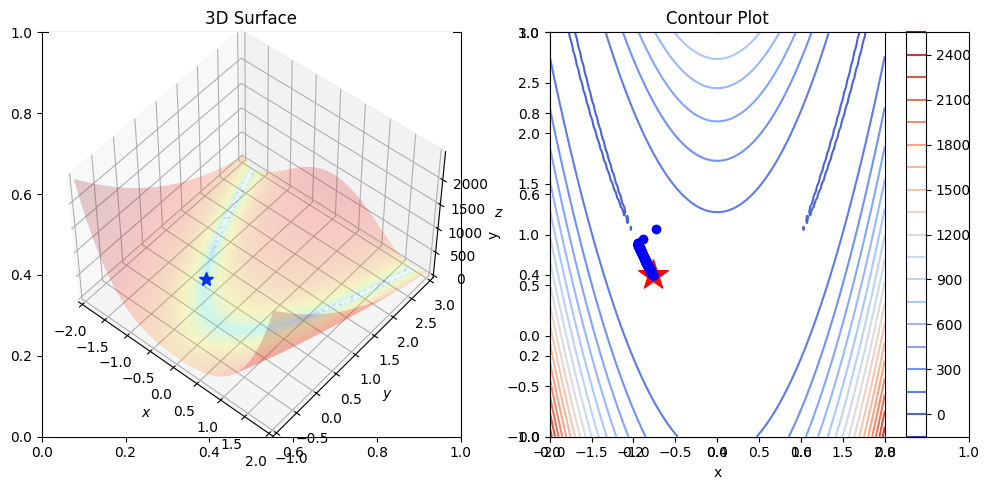

In [55]:
rastrigin_init_point_2D = np.random.uniform(-2, 2, size=2) #Se genera un número aleatorio y se acota entre el dominio de la función
max_iterations = 1000  


# Define la función de Rosenbrock en dos dimensiones
def rosenbrock_2d(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Define la función de Rosenbrock en tres dimensiones
def rosenbrock_3d(x, y, z):
    return (1 - x)**2 + 100 * ((y - x**2)**2) + z**2

# Implementar el método de descenso por gradiente en dos o tres dimensiones
def gradient_descent(func, learning_rate, max_iterations, dim):
    # Inicializar la condición inicial aleatoria
    if dim == 2:
        x = np.random.uniform(-2, 2)
        y = np.random.uniform(-1, 3)
        path = [(x, y)]
    elif dim == 3:
        x = np.random.uniform(-2, 2)
        y = np.random.uniform(-1, 3)
        z = np.random.uniform(-10, 10)
        path = [(x, y, z)]
    else:
        raise ValueError("La dimensión debe ser 2 o 3")
    
    # Iterar el descenso por gradiente
    for i in range(max_iterations):
        if dim == 2:
            grad_x = -2 * (1 - x) - 400 * x * (y - x**2)
            grad_y = 200 * (y - x**2)
            x -= learning_rate * grad_x
            y -= learning_rate * grad_y
            path.append((x, y))
        elif dim == 3:
            grad_x = -2 * (1 - x) - 400 * x * (y - x**2)
            grad_y = 200 * (y - x**2)
            grad_z = 2 * z
            x -= learning_rate * grad_x
            y -= learning_rate * grad_y
            z -= learning_rate * grad_z
            path.append((x, y, z))
    
    return path

# Configuración de los parámetros
learning_rate = 0.001
max_iterations = 200

# Ejecutar el método de descenso por gradiente en dos dimensiones
path_2d = gradient_descent(rosenbrock_2d, learning_rate, max_iterations, dim=2)

    # Generate a grid of x, y values
rtg_x_min, rtg_x_max, rtg_x_maxvalues = -2, 2, 100
rtg_y_min, rtg_y_max, rtg_y_maxvalues = -1, 3, 100

x_rastrigin = np.linspace(rtg_x_min, rtg_x_max, rtg_x_maxvalues)
y_rastrigin = np.linspace(rtg_y_min, rtg_y_max, rtg_y_maxvalues)
X_rastrigin, Y_rastrigin = np.meshgrid(x_rastrigin, y_rastrigin)
# Compute the Rastrigin function for each (x, y) pair
Z_rastrigin = np.zeros_like(X_rastrigin)
for i in range(X_rastrigin.shape[0]):
    for j in range(X_rastrigin.shape[1]):
        Z_rastrigin[i, j] = rosenbrock(np.array([X_rastrigin[i, j], Y_rastrigin[i, j]]))


#Test plot

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Plot 3D surface on the first subplot
rastrigin_surface_axes = fig.add_subplot(1, 2, 1, projection='3d', elev=50, azim=-50)
rastrigin_surface_axes.plot_surface(X_rastrigin, Y_rastrigin, Z_rastrigin, norm=LogNorm(), rstride=1, cstride=1, 
                                    edgecolor='none', alpha=.2, cmap=plt.cm.jet)
rastrigin_surface_axes.plot(*path_2d[-1], rosenbrock(path_2d[-1]), 'b*', markersize=10)
rastrigin_surface_axes.set_xlabel('$x$')
rastrigin_surface_axes.set_ylabel('$y$')
rastrigin_surface_axes.set_zlabel('$z$')
rastrigin_surface_axes.set_xlim((rtg_x_min, rtg_x_max))
rastrigin_surface_axes.set_ylim((rtg_y_min, rtg_y_max))
rastrigin_surface_axes.set_title('3D Surface')

# Plot contour on the second subplot
rastrigin_contour_axes = fig.add_subplot(1, 2, 2)
contour = rastrigin_contour_axes.contour(X_rastrigin, Y_rastrigin, Z_rastrigin, levels=20, cmap='coolwarm')
for point in path_2d:
    rastrigin_contour_axes.plot(*point, 'o-', color='blue', alpha=1)
rastrigin_contour_axes.scatter(*path_2d[-1], marker='*', s=500, color='red')
rastrigin_contour_axes.set_xlabel('x')
rastrigin_contour_axes.set_ylabel('y')
rastrigin_contour_axes.set_title('Contour Plot')
plt.colorbar(contour)

plt.tight_layout()
plt.show()

In [56]:
import matplotlib

def update(frame):
    x = path_2d[frame]
    line.set_data(x[0], x[1])
    if frame > 0:
        line_trace.set_data([path_2d[i][0] for i in range(frame+1)], [path_2d[i][1] for i in range(frame+1)])
    return line, line_trace

matplotlib.use('Agg') 

# Plot the contour and the starting point
rastrigin_contour_fig, rastrigin_contour_axes = plt.subplots(figsize=(5,5))
rastrigin_contour_axes.set_title('Optimization Path Animation')
rastrigin_contour_axes.set_xlabel('x')
rastrigin_contour_axes.set_ylabel('y')
rastrigin_contour = rastrigin_contour_axes.contour(X_rastrigin, Y_rastrigin, Z_rastrigin, levels=20, cmap='coolwarm')
rastrigin_contour_axes.plot(rastrigin_init_point_2D[0], rastrigin_init_point_2D[1], 'o', color='blue')

# Set up the animation

line, = rastrigin_contour_axes.plot([], [], 'o-', color='red', lw=10)
line_trace, = rastrigin_contour_axes.plot([], [], '-', color='green', lw=4)
ani = animation.FuncAnimation(rastrigin_contour_fig, update, frames=len(path_2d), interval=500, blit=True)
matplotlib.use('module://ipykernel.pylab.backend_inline')

ani.save('rosenbrock_animation_gradient.gif', writer='imagemagick')
HTML(ani.to_jshtml())



C:\Users\Andres\AppData\Local\Temp\ipykernel_10776\2273951348.py:5: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x[0], x[1])
C:\Users\Andres\AppData\Local\Temp\ipykernel_10776\2273951348.py:25: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed two minor releases later.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use('module://ipykernel.pylab.backend_inline')
C:\Users\Andres\AppData\Local\Temp\ipykernel_10776\2273951348.py:5: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x[0], x[1])


#### Función Rastrigin

##### Descenso por gradiente

Primero definimos las funciones necesarias para optimizar de descenso por gradiente

In [ ]:
# Define una función que calcula el gradiente de la función de Rastrigin dada una entrada x
def gradient(x):
    n = len(x) # Obtiene la longitud de la entrada x
    grad = np.zeros(n) # Crea un vector gradiente de ceros de longitud n
    for i in range(n): # Itera sobre cada entrada de la entrada x
        grad[i] = 2*x[i] + 20*np.pi*np.sin(2*np.pi*x[i]) # Calcula la entrada correspondiente en el vector gradiente
    return grad # Devuelve el vector gradiente

# Define una función que calcula la matriz Hessiana de la función de Rastrigin dada una entrada x
def hessian(x):
    n = len(x) # Obtiene la longitud de la entrada x
    hess = np.zeros((n, n)) # Crea una matriz Hessiana de ceros de tamaño n x n
    for i in range(n): # Itera sobre cada entrada de la entrada x
        for j in range(n): # Itera sobre cada entrada de la entrada x
            if i == j: # Si i y j son iguales
                hess[i][i] = 2 + 40*np.pi**2*np.cos(2*np.pi*x[i]) # Calcula la entrada correspondiente en la matriz Hessiana
            else:
                hess[i][j] = 0 # De lo contrario, establece la entrada correspondiente en la matriz Hessiana a cero
    return hess # Devuelve la matriz Hessiana

# Define una función que optimiza la función de Rastrigin dada una conjetura inicial, un número máximo de iteraciones y una tolerancia
def optimize_rastrigin(initial_guess, max_iterations, tolerance=1e-6):
    x = initial_guess # Establece la conjetura inicial como el valor actual de x
    path = [x] # Crea una lista que almacena los valores de x en cada iteración
    for i in range(max_iterations): # Itera sobre el número máximo de iteraciones
        grad = gradient(x) # Calcula el gradiente de la función de Rastrigin en el valor actual de x
        hess = hessian(x) # Calcula la matriz Hessiana de la función de Rastrigin en el valor actual de x
        step = np.linalg.solve(hess, -grad) # Calcula el paso de optimización utilizando la solución de la ecuación Hessiana
        x_new = x + step # Calcula el nuevo valor de x utilizando el paso de optimización
        if np.linalg.norm(x_new - x) < tolerance: # Si la norma de la diferencia entre el nuevo y el valor actual de x es menor que la tolerancia, la optimización se ha completado
            break
        x = x_new # De lo contrario, establece el nuevo valor de x como el valor actual de x y continúa iterando
        path.append(x) # Agrega el nuevo valor de x a la lista de valores de x en cada iteración
    return x, path # Devuelve el valor final

<b> Resultados de la optimización <b>

Init value: [-1.16489476 -3.09387274]
Minimum: [-0.99495864 -2.9848557 ]
Function value at minimum: 9.949560298580304
Optimization path: 
Punto evaluado:[-1.16489476 -3.09387274]-- Valor de la función en el punto: 17.522514854874295
Punto evaluado:[-0.88736281 -2.9692505 ]-- Valor de la función en el punto: 12.191463112147986
Punto evaluado:[-1.0167525  -2.98497963]-- Valor de la función en el punto: 10.043736117431358
Punto evaluado:[-0.99486974 -2.98485571]-- Valor de la función en el punto: 9.949561865783854
Punto evaluado:[-0.99495864 -2.9848557 ]-- Valor de la función en el punto: 9.949560298580304


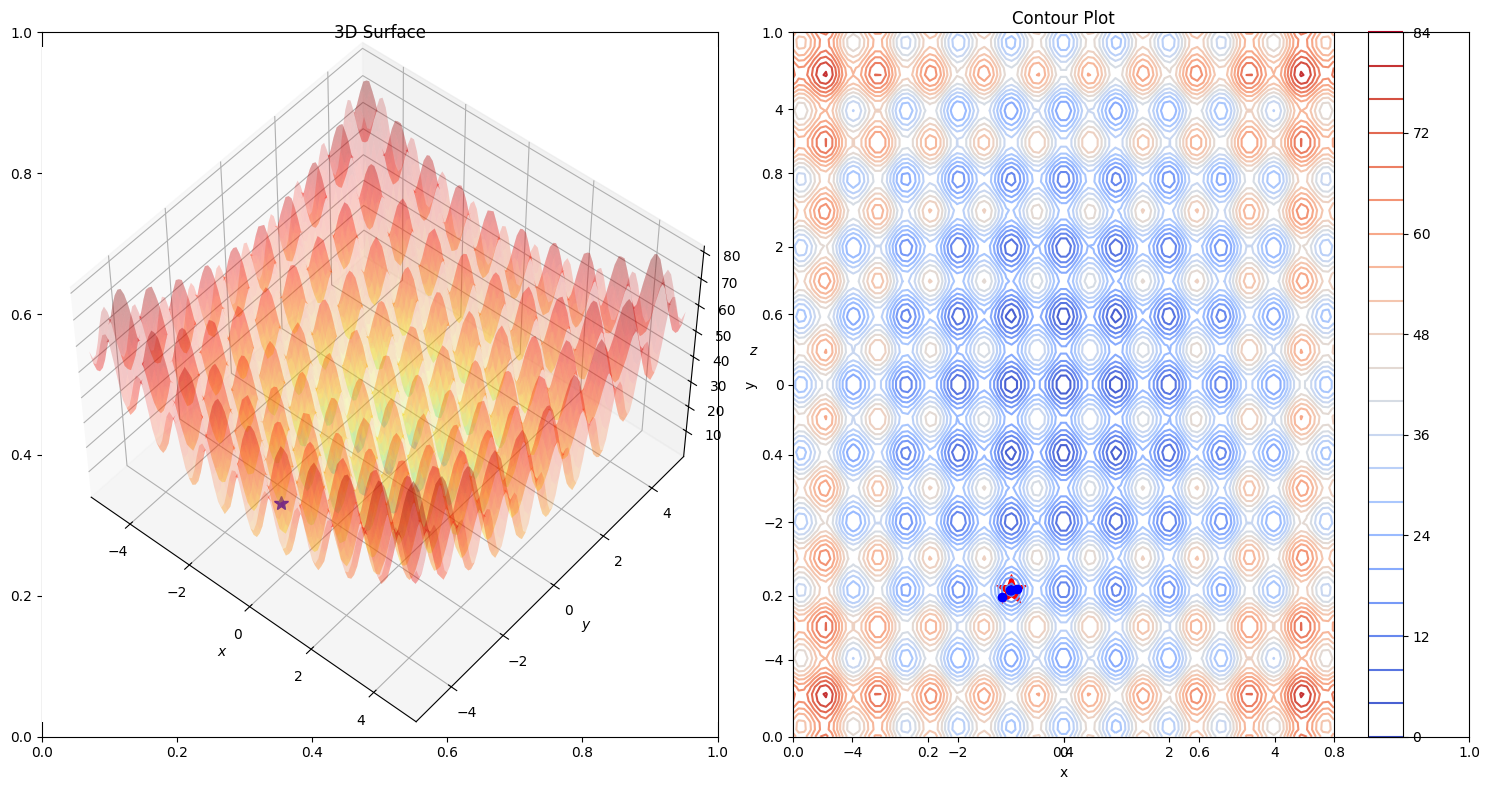

In [ ]:
rastrigin_init_point_2D = np.random.uniform(-5.12, 5.12, size=2) #Se genera un número aleatorio y se acota entre el dominio de la función
max_iterations = 1000  
rastrigin_min_2D, rastrigin_path_2D = optimize_rastrigin(rastrigin_init_point_2D, 1000)

#Impresión de resultados
print(f"Init value: {rastrigin_init_point_2D}")
print(f"Minimum: {rastrigin_min_2D}")
print(f"Function value at minimum: {rastrigin(rastrigin_min_2D)}")
print("Optimization path: ")
for point in rastrigin_path_2D:
    print(f"Punto evaluado:{point}--", f"Valor de la función en el punto: {rastrigin(point)}")

    # Generate a grid of x, y values
rtg_x_min, rtg_x_max, rtg_x_maxvalues = -5.12, 5.12, 100
rtg_y_min, rtg_y_max, rtg_y_maxvalues = -5.12, 5.12, 100

x_rastrigin = np.linspace(rtg_x_min, rtg_x_max, rtg_x_maxvalues)
y_rastrigin = np.linspace(rtg_y_min, rtg_y_max, rtg_y_maxvalues)
X_rastrigin, Y_rastrigin = np.meshgrid(x_rastrigin, y_rastrigin)
# Compute the Rastrigin function for each (x, y) pair
Z_rastrigin = np.zeros_like(X_rastrigin)
for i in range(X_rastrigin.shape[0]):
    for j in range(X_rastrigin.shape[1]):
        Z_rastrigin[i, j] = rastrigin(np.array([X_rastrigin[i, j], Y_rastrigin[i, j]]))

rastrigin_minimum= rastrigin_min_2D.reshape(-1, 1)

#Test plot

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15,8))

# Plot 3D surface on the first subplot
rastrigin_surface_axes = fig.add_subplot(1, 2, 1, projection='3d', elev=50, azim=-50)
rastrigin_surface_axes.plot_surface(X_rastrigin, Y_rastrigin, Z_rastrigin, norm=LogNorm(), rstride=1, cstride=1, 
                                    edgecolor='none', alpha=.2, cmap=plt.cm.jet)
rastrigin_surface_axes.plot(*rastrigin_minimum, rastrigin(rastrigin_minimum), 'b*', markersize=10)
rastrigin_surface_axes.set_xlabel('$x$')
rastrigin_surface_axes.set_ylabel('$y$')
rastrigin_surface_axes.set_zlabel('$z$')
rastrigin_surface_axes.set_xlim((rtg_x_min, rtg_x_max))
rastrigin_surface_axes.set_ylim((rtg_y_min, rtg_y_max))
rastrigin_surface_axes.set_title('3D Surface')

# Plot contour on the second subplot
rastrigin_contour_axes = fig.add_subplot(1, 2, 2)
contour = rastrigin_contour_axes.contour(X_rastrigin, Y_rastrigin, Z_rastrigin, levels=20, cmap='coolwarm')
for point in rastrigin_path_2D:
    rastrigin_contour_axes.plot(*point, 'o-', color='blue', alpha=1)
rastrigin_contour_axes.scatter(*rastrigin_minimum, marker='*', s=500, color='red')
rastrigin_contour_axes.set_xlabel('x')
rastrigin_contour_axes.set_ylabel('y')
rastrigin_contour_axes.set_title('Contour Plot')
plt.colorbar(contour)

plt.tight_layout()
plt.show()

<b> Animación <b>

In [ ]:
# Define the function to update the animation
import matplotlib


def update(frame):
    x = rastrigin_path_2D[frame]
    line.set_data(x[0], x[1])
    if frame > 0:
        line_trace.set_data([rastrigin_path_2D[i][0] for i in range(frame+1)], [rastrigin_path_2D[i][1] for i in range(frame+1)])
    return line, line_trace

matplotlib.use('Agg') 

# Plot the contour and the starting point
rastrigin_contour_fig, rastrigin_contour_axes = plt.subplots(figsize=(5,5))
rastrigin_contour_axes.set_title('Optimization Path Animation')
rastrigin_contour_axes.set_xlabel('x')
rastrigin_contour_axes.set_ylabel('y')
rastrigin_contour = rastrigin_contour_axes.contour(X_rastrigin, Y_rastrigin, Z_rastrigin, levels=20, cmap='coolwarm')
rastrigin_contour_axes.plot(rastrigin_init_point_2D[0], rastrigin_init_point_2D[1], 'o', color='blue')

# Set up the animation

line, = rastrigin_contour_axes.plot([], [], 'o-', color='red', lw=10)
line_trace, = rastrigin_contour_axes.plot([], [], '-', color='green', lw=4)
ani = animation.FuncAnimation(rastrigin_contour_fig, update, frames=len(rastrigin_path_2D), interval=500, blit=True)
matplotlib.use('module://ipykernel.pylab.backend_inline')

ani.save('rastrigin_animation_gradient.gif', writer='imagemagick')
HTML(ani.to_jshtml())

C:\Users\Andres\AppData\Local\Temp\ipykernel_10776\378559405.py:7: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x[0], x[1])
C:\Users\Andres\AppData\Local\Temp\ipykernel_10776\378559405.py:27: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed two minor releases later.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use('module://ipykernel.pylab.backend_inline')
C:\Users\Andres\AppData\Local\Temp\ipykernel_10776\378559405.py:7: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x[0], x[1])
C:\Users\Andres\AppData\Local\Temp\ipykernel_10776\378559405.py:7: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor relea

Discuta

¿Qué aportaron los métodos de descenso por gradiente y qué aportaron los métodos heurísticos? Para responder a esta pregunta considere el valor final de la función objetivo y el número de evaluaciones de la función objetivo. Para responder a esta pregunta es posible que se requiera hacer varias corridas de los algoritmos.

- Cuando hay múltiples mínimos locales, los métodos de descenso por gradiente pueden ser ineficaces, ya que corren el riesgo de quedar atrapados en uno de estos mínimos locales. Por otro lado, los métodos basados en algoritmos evolutivos, al realizar búsquedas más amplias en la función objetivo, tienen una menor probabilidad de quedar atrapados en mínimos locales.

- En el caso específico de la función de Rosenbrock, es importante elegir valores pequeños para la tasa de aprendizaje debido a la naturaleza de la función. Esta función presenta cambios abruptos en su valor en respuesta a pequeñas variaciones en las variables independientes. Si se utilizan valores grandes para la tasa de aprendizaje, existe el riesgo de que el algoritmo nunca converja al mínimo global.